# Датасет [WIDER FACES](http://shuoyang1213.me/WIDERFACE/)


In [1]:
from scipy import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [2]:
path_mat = 'WiderFaces/wider_face_train.mat'
path_images = 'C:/Users/Fedor/Documents/Projects/BelkaFaces/WiredFaces/WIDER_train/All'

In [3]:
mat = io.loadmat(path_mat)

### Список всех файлов

In [4]:
all_files = mat['file_list']

### Список всех координат лиц

In [5]:
all_boxes = mat['face_bbx_list']

## Пример изображений в датасете

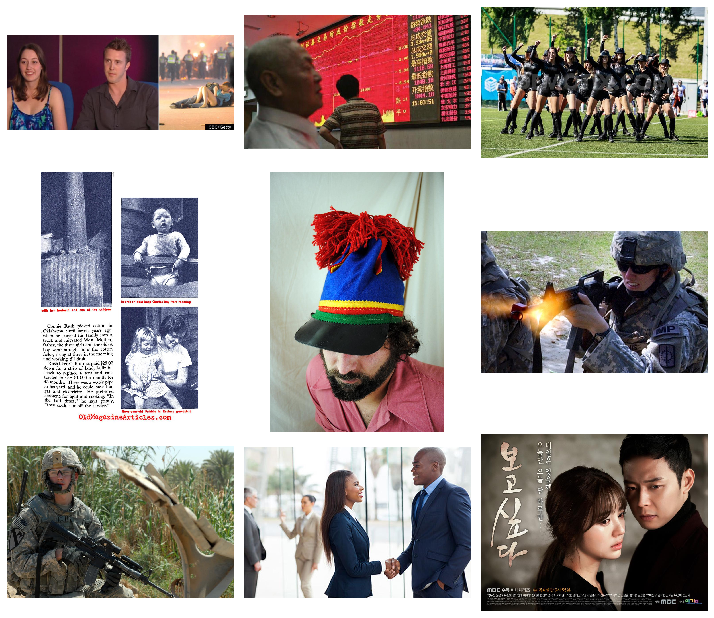

In [18]:
display_images(choose_random_images())

## Получим данные об изображениях в датасете

### Выберем рандомное изображение

In [325]:
random_image = choose_random_images(n=1)[0]
random_image

'40_Gymnastics_Gymnastics_40_578.jpg'

### Его номер в датасете 

In [326]:
folder, file = get_num_of_image(random_image)

Folder: 35 
File: 60


### Координаты лиц на изображении

In [327]:
boxes = get_boxes(folder, file)
boxes

array([[ 55, 214,  39,  38],
       [140, 251,  35,  40],
       [228, 274,  36,  40],
       [257, 237,  35,  38],
       [241, 192,  36,  42],
       [325, 278,  36,  42],
       [349, 222,  36,  38],
       [422, 281,  38,  43],
       [450, 232,  38,  45],
       [569, 221,  48,  48],
       [538, 285,  38,  48],
       [646, 290,  40,  45],
       [753, 153,  41,  48],
       [697, 222,  39,  49],
       [864, 166,  46,  54],
       [762, 297,  38,  43],
       [885, 310,  40,  48]])

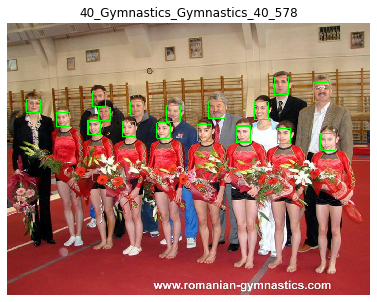

In [328]:
draw_rect(random_image, boxes)

## Easy (Scale) WIDER FACES

Датасет делится на три уровня сложности по размеру лиц на изображении: Легкий (больше 300 pixels), Средний (50-300 pixels), Сложный (10-50 pixels). Мы будем рассматривать легкую часть датасета (по рамзеру лиц), т.к. нам больше важен аспект расположения лица (угол, наклон) и аспект occlusion (макияж, маски, очки и т.д.). К тому же нет необходимости обнаруживать совсем маленькие лица на изображениях. 

In [16]:
easy_names = ['Gymnastics', 'Handshaking', 'Waiter', 'Conference',
                'Worker', 'Parachutist', 'Coach', 'Meeting',
                'Aerobics', 'Boat', 'Dancing', 'Swimming', 
                'Family', 'Balloonist', 'Dresses', 'Couple', 
                'Jockey', 'Tennis', 'Spa', 'Surgeons']


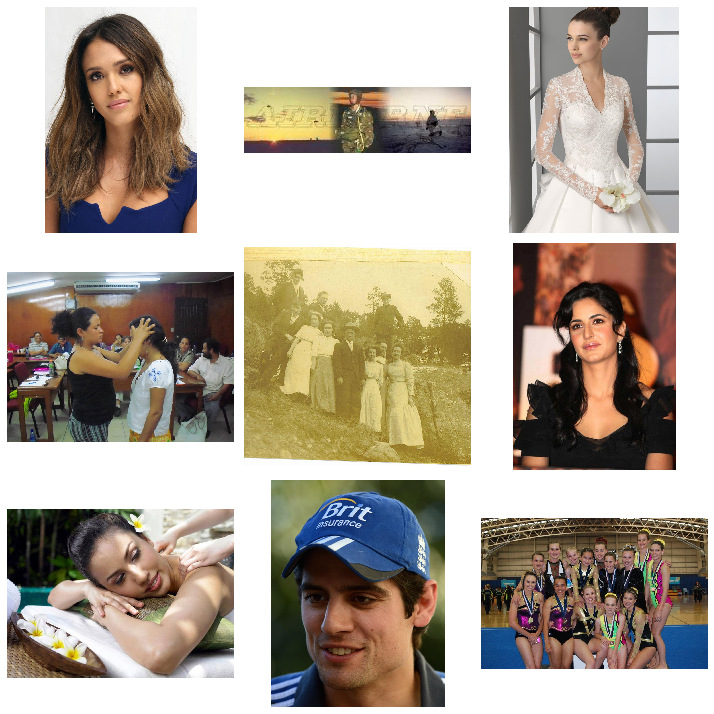

In [19]:
display_images(choose_random_images(easy=True))

## Helpers


In [8]:
def convert2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
def choose_random_images(easy=False, n=10):
    
    """
    Выбрать из датасета n картинок в случайном порядке
    easy=True -- выбрать из легкой части датасета  
    """
    
    images = []
    for _ in range(n):
        if(easy):
            easy_folders = get_easy_folders()
            folder = all_files[random.choice(easy_folders)]
        else:    
            folder = random.choice(all_files)
            
        name = random.choice(folder[0])[0][0]
        images.append(name + ".jpg")
    return images

In [10]:
def get_num_of_image(name):
    folder_num = -1 
    file_num = -1
    for folder in all_files:
        folder_num += 1
        file_num = -1
        for file_name in folder[0]:
            file_num += 1
            name_ = file_name[0][0]
            if (name_ + '.jpg' == name):
                # print("Folder: {0} \nFile: {1}".format(folder_num, file_num))
                return folder_num, file_num    

In [11]:
def get_boxes(folder, file):
    return all_boxes[folder][0][file][0]

In [12]:
def get_all_boxes(images):
    boxes = []
    for image in images:
        folder, file = get_num_of_image(image)
        boxes.append(get_boxes(folder, file))
    return boxes

In [13]:
def draw_rect(image, boxes):
    test_image = cv2.imread(path_images + '//' + image)
    img_copy = np.copy(test_image)
    
    for (x, y, w, h) in boxes:
        cv2.rectangle(img_copy,(x, y), (x+w, y+h), (0, 255, 0), 2)
        
    fig,ax = plt.subplots(1)
    fig.set_size_inches(9, 5)
    ax.set_title(image.split('.')[0])
    ax.imshow(convert2RGB(img_copy))
    plt.axis('off')
    plt.show()

In [14]:
def display_images(images):
    fig=plt.figure(figsize=(10, 10))
    columns = 3
    rows = 3
    for i in range(1, columns*rows +1):
        test_image = cv2.imread(path_images + '//' + images[i])
        img_copy = np.copy(test_image)
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(convert2RGB(img_copy))
        plt.axis('off')
        plt.tight_layout(True)
    plt.show()
    

In [18]:
def get_easy_folders(easy_names=easy_names):
    easy_folders = []
    for name in easy_names:
        for i in range(0, len(all_files)):
            if (name in all_files[i][0][0][0][0]):
                easy_folders.append(i)
    return easy_folders

# Тестирование решений

**Как будем тестировать?** 

1. Выбираем рандомные n изображений из датасета
2. Получаем координаты всех лиц на всех изображениях 
3. Получаем результаты работы методов на этих изображениях, т.е. получаем координаты лиц
4. Сравниваем полученные результаты с реальными координатами 
5. Считаем TP, FP, FN и recall
6. Сортируем по возрастанию recall

### N рандомных изображений

In [54]:
N = 3
images = choose_random_images(easy=True, n=N)

### Координаты лиц

In [55]:
boxes = get_all_boxes(images)

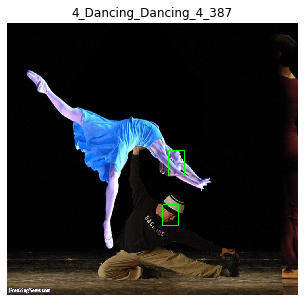

In [59]:
r = random.choice(range(0, N))
draw_rect(images[r], boxes[r])

### Точность метода
Для определения точности работы алгоритма будем использовать метрику IOU (Intersection over Union). Для каждого лица на изображении (ground-truth вектор) проверяем среди всех полученных векторов из метода параметр IOU. Если этот параметр $\geq0.5$, то лицо обнаружено верно, этот вектор обозначим как True Positive (TP). Если в конце у нас остались неподходящие векторы, то обозначаем как False Positive (FP). Если же лица вовсе не обнаружены, то обозначаем их как False Negative (FN). Из всевозможных метрик нам наиболее важен recall (recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм, т.е. показывает сколько лиц из всех лиц мы действительно нашли). $recall = \frac{TP}{TP + FN}$

In [60]:
def bb_intersection_over_union(ground_truth, predicted):
    
    boxA = [ground_truth[0], ground_truth[1], ground_truth[0] +
            ground_truth[2], ground_truth[1] + ground_truth[3]]
    boxB = [predicted[0], predicted[1], predicted[0] +
                 predicted[2], predicted[1] + predicted[3]]
    
    # (x, y) - координаты прямоугольника из пересечения
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    # Площадь прямоугольника, образованного пересечением двух других
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
    # Общая площадь двух прямоугольников
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    # intersection over union 
    iou = interArea / float(boxAArea + boxBArea - interArea)
    
    return iou

In [30]:
def calculate_metrics(results, boxes=boxes):
    
    TP = 0 # true-positive
    FP = 0 # false-positive 
    FN = 0 # false-negative
    
    # Бежим по всем ground-truth группам лиц
    for i in range(0, len(boxes)):
        tp = 0
        fp = 0
        fn = 0
        # Бежим по всем ground-truth лицам на изображении
        for j in range(0,len(boxes[i])):
            # Сравниваем с нашими результатами
            for box in results[i]:
                if (bb_intersection_over_union(boxes[i][j], box) >= 0.5):
                    tp += 1
            fp = len(results[i]) - tp
            fn = len(boxes[i]) - tp
            
        TP += tp
        FP += fp
        FN += fn
        
    return TP, FN, FP

In [31]:
def recall(TP, FN):
    return TP/(TP + FN)

## Каскады Хаара и LBP ([OpenCV](https://github.com/opencv/opencv))

### Каскады Хаара

In [32]:
haar_path = 'HaarCascades/'
haars = [haar_path + x for x in os.listdir(haar_path)]
haars

['HaarCascades/haarcascade_frontalface_alt.xml',
 'HaarCascades/haarcascade_frontalface_alt2.xml',
 'HaarCascades/haarcascade_frontalface_alt_tree.xml',
 'HaarCascades/haarcascade_frontalface_default.xml',
 'HaarCascades/haarcascade_profileface.xml']

#### Результаты разных каскадов Хаара

In [69]:
haar_res = cascades_results(haars)
haar_res

{'haarcascade_frontalface_alt': {'TP': 3, 'FN': 2, 'FP': 0, 'Recall': 0.6},
 'haarcascade_frontalface_alt2': {'TP': 3, 'FN': 2, 'FP': 1, 'Recall': 0.6},
 'haarcascade_frontalface_alt_tree': {'TP': 1,
  'FN': 4,
  'FP': 0,
  'Recall': 0.2},
 'haarcascade_frontalface_default': {'TP': 3, 'FN': 2, 'FP': 2, 'Recall': 0.6},
 'haarcascade_profileface': {'TP': 1, 'FN': 4, 'FP': 0, 'Recall': 0.2}}

#### Лучший результат

In [70]:
best_haar = get_best_res(haar_res)

 Cascade: haarcascade_frontalface_default 
 TP: 3 
 FN: 2 
 FP: 2 
 Recall: 0.6


### Каскады LBP

In [71]:
lbp_path = 'LBPCascades/'
lbps = [lbp_path + x for x in os.listdir(lbp_path)]
lbps

['LBPCascades/lbpcascade_frontalface.xml',
 'LBPCascades/lbpcascade_frontalface_improved.xml',
 'LBPCascades/lbpcascade_profileface.xml']

#### Результаты разных LBP каскадов

In [72]:
lbp_res = cascades_results(lbps)
lbp_res

{'lbpcascade_frontalface': {'TP': 3, 'FN': 2, 'FP': 0, 'Recall': 0.6},
 'lbpcascade_frontalface_improved': {'TP': 1, 'FN': 4, 'FP': 2, 'Recall': 0.2},
 'lbpcascade_profileface': {'TP': 0, 'FN': 5, 'FP': 0, 'Recall': 0.0}}

#### Лучший результат

In [73]:
best_lbp = get_best_res(lbp_res)

 Cascade: lbpcascade_frontalface 
 TP: 3 
 FN: 2 
 FP: 0 
 Recall: 0.6


### Helpers

In [66]:
def cascades_faces(cascade_path, images):
    
    def cascades_faces_detect(cascade_path, colored_img, scaleFactor=1.1):

        cascade = cv2.CascadeClassifier(cascade_path)
        img_copy = np.copy(colored_img)
        gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
        faces = cascade.detectMultiScale(
            gray, scaleFactor=scaleFactor, minNeighbors=5)
        return faces
    
    all_faces = []
    for image in images:
        faces = cascades_faces_detect(cascade_path, cv2.imread(path_images + '/' + image))
        all_faces.append(faces)
        
    return all_faces

In [67]:
def cascades_results(cascades, images=images, boxes=boxes):
    res = {}
    for cascade in cascades:
        metrics = {}
        results_cascade = cascades_faces(cascade, images)
        TP, FN, FP = calculate_metrics(results_cascade, boxes)
        metrics["TP"] = TP
        metrics["FN"] = FN
        metrics["FP"] = FP
        metrics["Recall"] = recall(TP, FN)
        name = cascade.split('/')[1].split('.')[0]
        res[name] = metrics
    return res

In [68]:
def get_best_res(d):
    sorted_d = sorted(d.items(), key=lambda item: list(item[1].items())[3][1])
    best = sorted_d[-1:][0]
    
    print(" Cascade: {0} \n TP: {1} \n FN: {2} \n FP: {3} \n Recall: {4}".format(best[0], best[1]["TP"],
                                                                         best[1]["FN"], best[1]["FP"],
                                                                         best[1]["Recall"]))
    return sorted_d[-1:][0]

## [FaceNet’s MTCNN](https://github.com/davidsandberg/facenet/tree/master/src/align)

In [6]:
from mtcnn import MTCNN 

Using TensorFlow backend.


In [107]:
results = mtcnn_faces(images)

In [115]:
best_mtcnn = mtcnn_result(results, boxes) 

 MTCNN 
 TP: 3 
 FN: 2 
 FP: 0 
 Recall: 0.6


### Helpers

In [109]:
def mtcnn_faces(images):
    
    def mtcnn_faces_detect(img):
        detector = MTCNN()
        image = cv2.imread(path_images + '/' + img)
        faces = detector.detect_faces(image)    
        return faces 
    
    all_faces = []
    for image in images:
        faces = mtcnn_faces_detect(image)
        tmp = []
        for face in faces:
            tmp.append(face["box"])
        all_faces.append(tmp)
        
    return all_faces

In [113]:
def mtcnn_result(results, boxes):
    res = {}
    metrics = {}
    TP, FN, FP = calculate_metrics(results, boxes)
    metrics["TP"] = TP
    metrics["FN"] = FN
    metrics["FP"] = FP
    metrics["Recall"] = recall(TP, FN)
    res["MTCNN"] = metrics
    
    print(" MTCNN \n TP: {0} \n FN: {1} \n FP: {2} \n Recall: {3}".format(metrics["TP"],
                                                                         metrics["FN"], metrics["FP"],
                                                                         metrics["Recall"]))
    return res

## [dlib's HOG](http://dlib.net/)

## [dlib's MMOD](http://dlib.net/)